In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset_train = pd.read_csv('IBM.csv')
training_set = dataset_train.iloc[:, 1:2].values

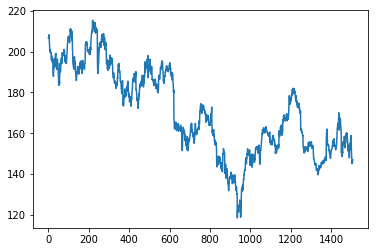

In [3]:
plt.plot(training_set)

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))

In [5]:
training_set_scaled=sc.fit_transform(training_set)

In [6]:
X=[]
y=[]
for i in range(60,1509):
    X.append(training_set_scaled[i-60:i,0])
    y.append(training_set_scaled[i,0])
X, y = np.array(X), np.array(y)

In [7]:
X = np.reshape(X, (X.shape[0], X.shape[1],1))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [10]:
regressor= Sequential()

In [11]:
regressor.add(LSTM(units=50, return_sequences= True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

In [14]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(Dense(units=1))

In [16]:
regressor.compile(optimizer= 'adam', loss ='mean_squared_error')

In [17]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1159/1159 [==============================] - 14s 12ms/step - loss: 0.0491
Epoch 2/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.0092
Epoch 3/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.0079
Epoch 4/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.0071
Epoch 5/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.0069
Epoch 6/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.0068
Epoch 7/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.0064
Epoch 8/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.0061
Epoch 9/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.0067
Epoch 10/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.0059
Epoch 11/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.0054
Epoch 12/100
1159/1159 [==============================] - 8s 7ms/step - 

1159/1159 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 97/100
1159/1159 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 98/100
1159/1159 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 99/100
1159/1159 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 100/100
1159/1159 [==============================] - 4s 3ms/step - loss: 0.0015A: 1s - 


In [18]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)
real_stock_price=sc.inverse_transform([y_test])

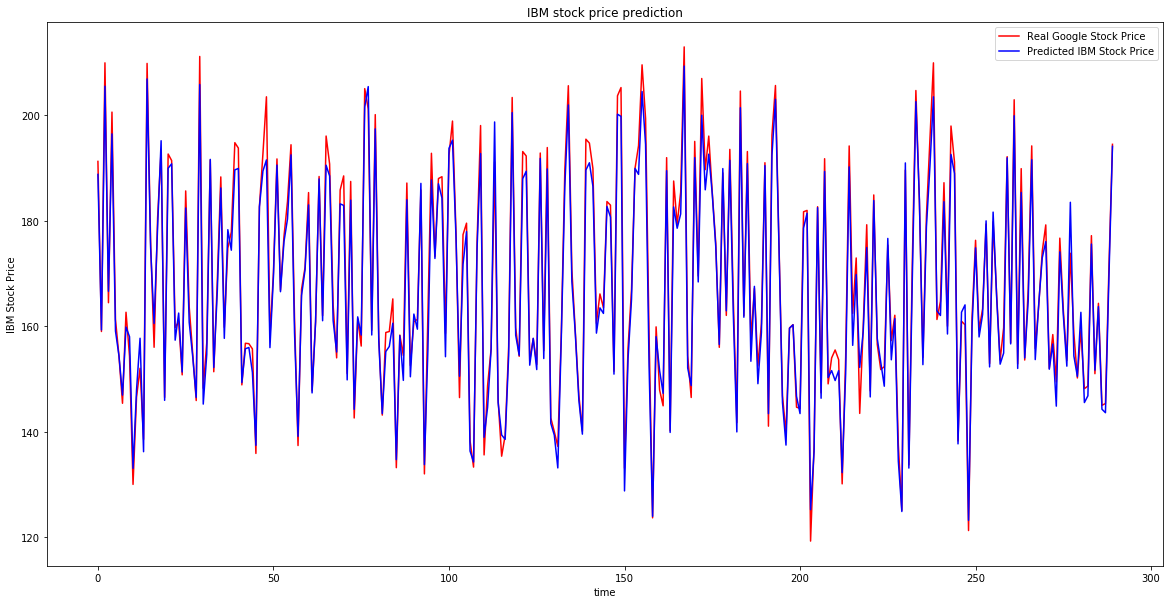

In [19]:
plt.figure(figsize=(20,10))
plt.plot(np.reshape(real_stock_price,(predicted_stock_price.shape[0],1)), color='red', label= 'Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted IBM Stock Price')
plt.title('IBM stock price prediction')
plt.xlabel('time')
plt.ylabel('IBM Stock Price')
plt.legend()

plt.show()

In [20]:
from sklearn.metrics import r2_score,accuracy_score

In [21]:
r2_score(np.reshape(real_stock_price,(predicted_stock_price.shape[0],1)),predicted_stock_price)

0.98025071246821782